## Symbolic Calculation Project

### Training LSTM to learn cos functions taylor expansion upto 4th order

In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Define the Taylor series of sin(x) up to the 5th order
def taylor_cos(x):
    return 1 - (x ** 2)/2 + (x ** 4)/24 - (x ** 6)/720

# Generate training data
x_train = np.arange(-2*np.pi, 2*np.pi, 0.1)
y_train = taylor_cos(x_train)

# Reshape input data to match the expected input shape of LSTM
x_train = x_train.reshape((len(x_train), 1, 1))

# Basic LSTM structure
model = Sequential()
model.add(LSTM(20, input_shape=(1, 1))) # units = 20
model.add(Dense(1))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20)                1760      
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________
None


In [2]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam',metrics = ['accuracy'])

# Fit the model to the training data
model.fit(x_train, y_train, epochs=1000, batch_size=10)

Epoch 1/1000
13/13 [==============================] - 3s 9ms/step - loss: 100.7999 - accuracy: 0.0000e+00
Epoch 2/1000
13/13 [==============================] - 0s 5ms/step - loss: 99.8695 - accuracy: 0.0000e+00
Epoch 3/1000
13/13 [==============================] - 0s 4ms/step - loss: 99.0515 - accuracy: 0.0000e+00
Epoch 4/1000
13/13 [==============================] - 0s 4ms/step - loss: 98.2731 - accuracy: 0.0000e+00
Epoch 5/1000
13/13 [==============================] - 0s 4ms/step - loss: 97.3880 - accuracy: 0.0000e+00
Epoch 6/1000
13/13 [==============================] - 0s 4ms/step - loss: 96.5797 - accuracy: 0.0000e+00
Epoch 7/1000
13/13 [==============================] - 0s 4ms/step - loss: 95.6521 - accuracy: 0.0000e+00
Epoch 8/1000
13/13 [==============================] - 0s 4ms/step - loss: 94.7373 - accuracy: 0.0000e+00
Epoch 9/1000
13/13 [==============================] - 0s 4ms/step - loss: 93.8297 - accuracy: 0.0000e+00
Epoch 10/1000
13/13 [==============================] -

In [3]:
# Evaluate the model on new data
x_test = np.arange(-np.pi, np.pi, 0.1)
y_test = taylor_cos(x_test)
x_test = x_test.reshape((len(x_test), 1, 1))
mse = model.evaluate(x_test, y_test)
print('MSE:', mse)

2/2 [==============================] - 1s 8ms/step - loss: 0.0654 - accuracy: 0.0000e+00
MSE: [0.06542748957872391, 0.0]


In [4]:
# Generate predictions using the model
y_pred = model.predict(x_test)

2/2 [==============================] - 0s 8ms/step


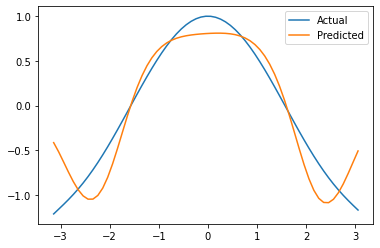

In [5]:
# Plot the results
import matplotlib.pyplot as plt
plt.plot(x_test[:, 0, 0], y_test, label='Actual')
plt.plot(x_test[:, 0, 0], y_pred, label='Predicted')
plt.legend()
plt.show()

In [6]:
model.save('LSTM_cos.h5')  